Data untuk provinsi Jawa Timur sebelum diproses:
       provinsi  jumlah  tahun
14   Jawa Timur  16.048   2022
49   Jawa Timur   0.000   2021
84   Jawa Timur  35.152   2020
119  Jawa Timur  35.706   2019
154  Jawa Timur  35.270   2018
189  Jawa Timur  35.270   2017
224  Jawa Timur  27.323   2016
259  Jawa Timur  27.323   2015

TimeSeries untuk provinsi Jawa Timur sebelum diproses:
2022    16.048
2021     0.000
2020    35.152
2019    35.706
2018    35.270
2017    35.270
2016    27.323
2015    27.323
dtype: float64


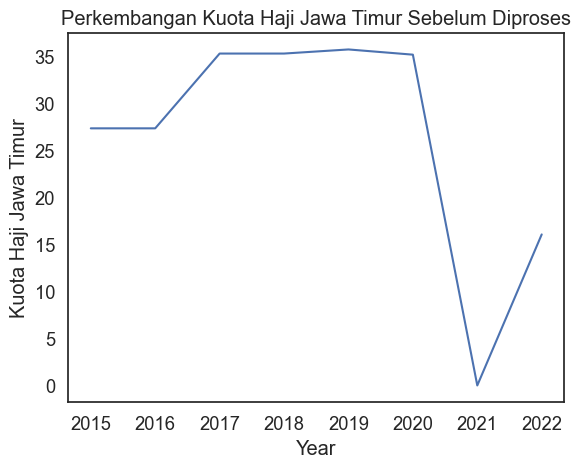

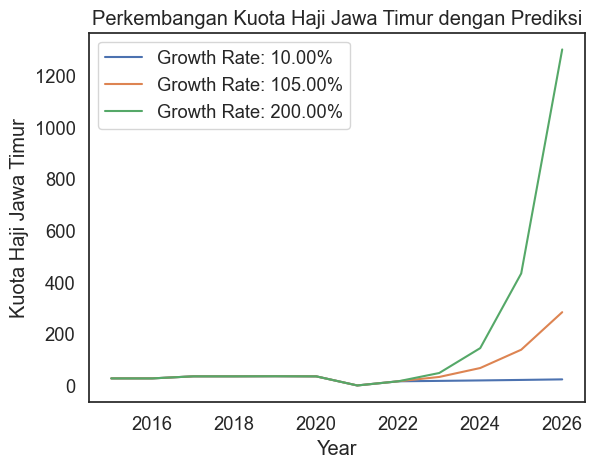

Hasil prediksi untuk provinsi Jawa Timur
Growth Rate: 10.00%, Prediksi Kuota Tahun 2027: 25.845
Growth Rate: 10.00%, Prediksi Kuota Tahun 2028: 28.430
Growth Rate: 10.00%, Prediksi Kuota Tahun 2029: 31.273
Growth Rate: 10.00%, Prediksi Kuota Tahun 2030: 34.400
Growth Rate: 10.00%, Prediksi Kuota Tahun 2031: 37.840
Growth Rate: 105.00%, Prediksi Kuota Tahun 2027: 581.019
Growth Rate: 105.00%, Prediksi Kuota Tahun 2028: 1191.089
Growth Rate: 105.00%, Prediksi Kuota Tahun 2029: 2441.732
Growth Rate: 105.00%, Prediksi Kuota Tahun 2030: 5005.550
Growth Rate: 105.00%, Prediksi Kuota Tahun 2031: 10261.378
Growth Rate: 200.00%, Prediksi Kuota Tahun 2027: 3899.664
Growth Rate: 200.00%, Prediksi Kuota Tahun 2028: 11698.992
Growth Rate: 200.00%, Prediksi Kuota Tahun 2029: 35096.976
Growth Rate: 200.00%, Prediksi Kuota Tahun 2030: 105290.928
Growth Rate: 200.00%, Prediksi Kuota Tahun 2031: 315872.784

Growth rate terdekat dengan data aktual adalah 10.00%
Selisih antara prediksi akhir dan data aktu

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from modsim import *

# Membaca data
data = pd.read_csv("Perkembangan Kuota Jemaah Haji Menurut Provinsi.csv")

# Fungsi untuk membuat TimeSeries dari data yang belum diproses
def make_time_series(data):
    time_series = TimeSeries()
    for index, row in data.iterrows():
        year = row['tahun']
        jumlah = row['jumlah']
        time_series[year] = jumlah
    return time_series

# Fungsi untuk filter data berdasarkan provinsi
def filter_data_by_province(data, province):
    return data[data['provinsi'] == province]

# Input dari pengguna untuk provinsi
province = input("Masukkan nama provinsi: ")

# Fungsi untuk filter data berdasarkan provinsi
data_provinsi = filter_data_by_province(data, province)

# Cetak data provinsi sebelum diproses
print("Data untuk provinsi", province, "sebelum diproses:")
print(data_provinsi)

# Buat TimeSeries dari data yang belum diproses
time_series_provinsi = make_time_series(data_provinsi)

# Cetak TimeSeries yang dibuat
print("\nTimeSeries untuk provinsi", province, "sebelum diproses:")
print(time_series_provinsi)

# Plot TimeSeries
plt.plot(time_series_provinsi)
plt.xlabel('Year')
plt.ylabel(f'Kuota Haji {province}')
plt.title(f'Perkembangan Kuota Haji {province} Sebelum Diproses')
plt.show()

# Menginisialisasi System
def make_system(data, growth_rate, pred_years):
    initial_year = data['tahun'].min()
    final_year = data['tahun'].max() + pred_years
    provinsi = data['provinsi'].unique()[0]
    
    return System(initial_year=initial_year,
                  final_year=final_year,
                  provinsi=provinsi,
                  growth_rate=growth_rate)

# Membuat State awal
def make_initial_state(system, data):
    initial_kuota = data[data['tahun'] == system.initial_year]['jumlah'].sum()
    return State(year=system.initial_year, kuota=initial_kuota)

# Update function untuk State
def update_state(state, system, t, data):
    current_year = int(t)
    yearly_data = data[data['tahun'] == current_year]
    
    if not yearly_data.empty:
        kuota = yearly_data['jumlah'].sum()
    else:
        if current_year <= system.final_year:
            kuota = state.kuota * (1 + system.growth_rate)
        else:
            return None  # Mengembalikan None untuk menandakan akhir iterasi
    
    return State(year=current_year, kuota=kuota)

# Membuat Timeseries
def run_simulation(system, initial_state, data):
    t_array = linrange(system.initial_year, system.final_year)
    results = TimeSeries()
    
    state = initial_state
    for t in t_array:
        state = update_state(state, system, t, data)
        if state is None:
            break  # Berhenti iterasi jika mencapai tahun terakhir yang diprediksi
        results[t] = state.kuota
    
    return results

# SweepSeries untuk mensimulasikan berbagai growth_rate
def simulate_province(data, province, growth_rates, pred_years):
    data_provinsi = filter_data_by_province(data, province)
    sweep = SweepSeries()
    
    for rate in growth_rates:
        system = make_system(data_provinsi, rate, pred_years)
        initial_state = make_initial_state(system, data_provinsi)
        results = run_simulation(system, initial_state, data_provinsi)
        sweep[rate] = results
    
    return sweep

# Parameter simulasi
pred_years = 5  # Jumlah tahun prediksi

# Input dari pengguna untuk provinsi dan growth rates yang diinginkan
province = input("Masukkan nama provinsi: ")
min_growth_rate = float(input("Masukkan growth rate minimum (misal, 0.01 untuk 1%): "))
max_growth_rate = float(input("Masukkan growth rate maksimum (misal, 0.1 untuk 10%): "))
num_growth_rates = int(input("Masukkan jumlah nilai growth rate yang diinginkan (misal, 5): "))

# Membuat linspace untuk growth rates
growth_rates = linspace(min_growth_rate, max_growth_rate, num_growth_rates)

# Jalankan simulasi untuk provinsi yang dipilih
sweep = simulate_province(data, province, growth_rates, pred_years)

# Plotting results
for rate, series in sweep.items():
    plt.plot(series, label=f'Growth Rate: {rate:.2%}')

plt.xlabel('Year')
plt.ylabel(f'Kuota Haji {province}')
plt.title(f'Perkembangan Kuota Haji {province} dengan Prediksi')
plt.legend()
plt.show()

# Mencari growth rate terdekat dengan data aktual terakhir
actual_last_year = data_provinsi['tahun'].max()
actual_last_value = data_provinsi[data_provinsi['tahun'] == actual_last_year]['jumlah'].sum()

closest_rate = None
closest_difference = float('inf')
closest_series = None
for rate, series in sweep.items():
    if actual_last_year in series.index:
        predicted_value = series[actual_last_year]
        difference = abs(predicted_value - actual_last_value)
        if difference < closest_difference:
            closest_difference = difference
            closest_rate = rate
            closest_series = series

# Cetak hasil prediksi
print("Hasil prediksi untuk provinsi", province)
for rate, series in sweep.items():
    final_year = int(series.index[-1])
    for i in range(1, 6):
        predicted_quota = series[final_year] * (1 + rate) ** i
        print(f'Growth Rate: {rate:.2%}, Prediksi Kuota Tahun {final_year + i}: {predicted_quota:.3f}')

# Cetak growth rate terdekat
print(f"\nGrowth rate terdekat dengan data aktual adalah {closest_rate:.2%}")

# Hitung selisih antara prediksi akhir dan data akhir
predicted_final_year = closest_series.index[-1]
predicted_final_value = closest_series[predicted_final_year]
actual_final_value = data_provinsi[data_provinsi['tahun'] == predicted_final_year]['jumlah'].sum()
difference_final = predicted_final_value - actual_final_value

print(f"Selisih antara prediksi akhir dan data aktual akhir adalah {difference_final:.2f}.")
